In [20]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import researchpy as rp
import scipy.stats as stats

# "Hea õppimise harjumuse" ülesande tulemused
heaHarjumus = pd.read_csv("hea_oppimise_harjumuse_punktid.csv", encoding='utf-8')

hinded = pd.read_csv("tudengid_moodlest_hinded.csv", encoding='utf-8')
hinded["nimi"] = hinded.apply(lambda row: row["Eesnimi"] + " " + row["Perenimi"], axis=1)
hinded['nimi'] = hinded['nimi'].str.strip()
hinded = hinded[["nimi", "Lõpphinne (Punktid)"]]

merge_tabel = pd.merge(heaHarjumus, hinded, on=["nimi"])

Text(0.5, 0, 'Hea harjumuse ülesande vastuste arv tudengi kohta')

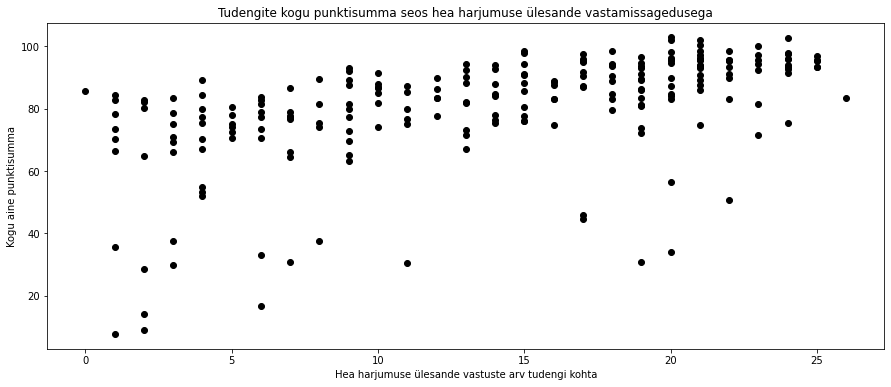

In [22]:
harjumus = merge_tabel[["nimi", "kokku", "Lõpphinne (Punktid)"]]
harjumus_df = pd.DataFrame(harjumus)
harjumus_df.sort_values(by="kokku")

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)

plt.plot(harjumus_df["kokku"], harjumus_df["Lõpphinne (Punktid)"], 'o', color='black');

plt.title("Tudengite kogu punktisumma seos hea harjumuse ülesande vastamissagedusega")
plt.ylabel("Kogu aine punktisumma")
plt.xlabel("Hea harjumuse ülesande vastuste arv tudengi kohta")

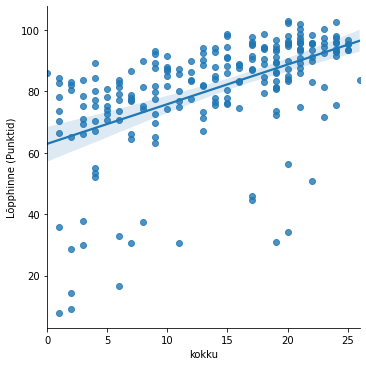

In [23]:
sns.lmplot(x="kokku", y="Lõpphinne (Punktid)", data=harjumus_df);

In [24]:
# https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html#coefficient-of-correlation
stats.pearsonr(harjumus_df["kokku"], harjumus_df["Lõpphinne (Punktid)"])

# Vastus: (0.5216144419123279, 8.068963104395677e-17)
# 1. Pearson’s r 
# 2. A p-value. This is the probability that the true value of r is zero (no correlation).

(0.5216144419123279, 8.068963104395677e-17)

## Tuju ja loengus käimise seos

In [25]:
heaHarjumusVastused = pd.read_csv("hea-õppimise-harjumus.csv", encoding='utf-8')
heaHarjumusVastused = heaHarjumusVastused[["Ajatempel", "Ees- ja perekonnanimi", "Olen praegu...", "Olen praegu... 2", "Kas sa oled täna õppinud (sh koduseid ülesandeid teinud)?"]]
heaHarjumusVastused.rename(columns = {"Ees- ja perekonnanimi": "Nimi", "Olen praegu...":'Tuju', "Olen praegu... 2":"Puhkus", "Kas sa oled täna õppinud (sh koduseid ülesandeid teinud)?":"Tegevus"}, inplace = True)
heaHarjumusVastused = heaHarjumusVastused.loc[heaHarjumusVastused["Tegevus"].str.startswith('Ei', na=False) & (heaHarjumusVastused["Ajatempel"].str.startswith('2022/10/27', na=False) | heaHarjumusVastused["Ajatempel"].str.startswith('2022/11/03', na=False))]

osalemised = pd.read_csv("loengus_osalemised.csv", encoding='unicode_escape')
osalemised["Nimi"] = osalemised.apply(lambda row: row["Eesnimi"] + " " + row["Perenimi"], axis=1).str.strip()
osalemised = osalemised[["Nimi", "27 okt   2022 2.15 Ühine", '3 nov   2022 2.15 Ühine']]
osalemised.rename(columns = {"27 okt   2022 2.15 Ühine": "27okt", "3 nov   2022 2.15 Ühine":'3nov'}, inplace = True)
osalemised = osalemised[osalemised["27okt"].str.startswith('K', na=False) | osalemised["3nov"].str.startswith('K', na=False) | osalemised["27okt"].str.startswith('P', na=False) | osalemised["3nov"].str.startswith('P', na=False)]

merge_tabel = pd.merge(osalemised,heaHarjumusVastused, on=["Nimi"])

In [26]:
merge_tabel_27okt = merge_tabel[merge_tabel["Ajatempel"].str.startswith('2022/10/27', na=False)]

summary, results = rp.ttest(group1= merge_tabel_27okt["Tuju"][merge_tabel_27okt["27okt"].str.startswith('K', na=False)], group1_name= "Kohal",
                            group2= merge_tabel_27okt["Tuju"][merge_tabel_27okt["27okt"].str.startswith('P', na=False)], group2_name= "Puudub")
print(summary)
print(results)


   Variable      N      Mean        SD        SE  95% Conf.  Interval
0     Kohal  126.0  2.087302  0.876537  0.078088   1.932755  2.241848
1    Puudub   20.0  2.200000  0.894427  0.200000   1.781395  2.618605
2  combined  146.0  2.102740  0.876745  0.072560   1.959328  2.246152
               Independent t-test   results
0  Difference (Kohal - Puudub) =    -0.1127
1           Degrees of freedom =   144.0000
2                            t =    -0.5327
3        Two side test p value =     0.5951
4       Difference < 0 p value =     0.2975
5       Difference > 0 p value =     0.7025
6                    Cohen's d =    -0.1282
7                    Hedge's g =    -0.1276
8               Glass's delta1 =    -0.1286
9             Point-Biserial r =    -0.0443


In [27]:
merge_tabel_3nov = merge_tabel[merge_tabel["Ajatempel"].str.startswith('2022/11/03', na=False)]

summary, results = rp.ttest(group1= merge_tabel_3nov["Tuju"][merge_tabel_3nov["3nov"].str.startswith('K', na=False)], group1_name= "Kohal",
                            group2= merge_tabel_3nov["Tuju"][merge_tabel_3nov["3nov"].str.startswith('P', na=False)], group2_name= "Puudub")
print(summary)
print(results)


   Variable      N      Mean        SD        SE  95% Conf.  Interval
0     Kohal  124.0  1.919355  0.822417  0.073855   1.773163  2.065547
1    Puudub   25.0  2.120000  0.881287  0.176257   1.756223  2.483777
2  combined  149.0  1.953020  0.832901  0.068234   1.818182  2.087859
               Independent t-test   results
0  Difference (Kohal - Puudub) =    -0.2006
1           Degrees of freedom =   147.0000
2                            t =    -1.0996
3        Two side test p value =     0.2733
4       Difference < 0 p value =     0.1367
5       Difference > 0 p value =     0.8633
6                    Cohen's d =    -0.2411
7                    Hedge's g =    -0.2398
8               Glass's delta1 =    -0.2440
9             Point-Biserial r =    -0.0903


<AxesSubplot:>

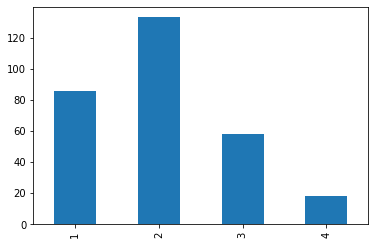

In [28]:
merge_tabel = pd.DataFrame(merge_tabel)
merge_tabel["Tuju"].value_counts(sort=False, normalize=False).plot(kind='bar')

In [29]:
summary, results = rp.ttest(group1= merge_tabel["Tuju"][merge_tabel["27okt"].str.startswith('K', na=False) | merge_tabel["3nov"].str.startswith('K', na=False)], group1_name= "Kohal",
                            group2= merge_tabel["Tuju"][merge_tabel["27okt"].str.startswith('P', na=False) | merge_tabel["3nov"].str.startswith('P', na=False)], group2_name= "Puudub")
print(summary)
print(results)

# Vastus
# Kohal  269 tudengit, 2.026022
# Puudub   71 tudengit, 2.197183 
# p = 0.1399

   Variable      N      Mean        SD        SE  95% Conf.  Interval
0     Kohal  269.0  2.026022  0.861312  0.052515   1.922628  2.129417
1    Puudub   71.0  2.197183  0.888333  0.105426   1.986918  2.407448
2  combined  340.0  2.061765  0.868496  0.047101   1.969118  2.154411
               Independent t-test   results
0  Difference (Kohal - Puudub) =    -0.1712
1           Degrees of freedom =   338.0000
2                            t =    -1.4797
3        Two side test p value =     0.1399
4       Difference < 0 p value =     0.0699
5       Difference > 0 p value =     0.9301
6                    Cohen's d =    -0.1974
7                    Hedge's g =    -0.1970
8               Glass's delta1 =    -0.1987
9             Point-Biserial r =    -0.0802


<AxesSubplot:>

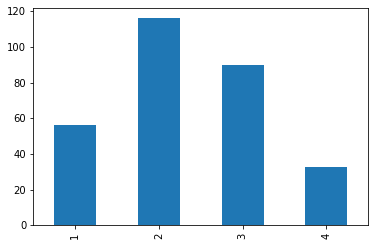

In [30]:
merge_tabel = pd.DataFrame(merge_tabel)
merge_tabel["Puhkus"].value_counts(sort=False, normalize=False).plot(kind='bar')

In [31]:
summary, results = rp.ttest(group1= merge_tabel["Puhkus"][merge_tabel["27okt"].str.startswith('K', na=False) | merge_tabel["3nov"].str.startswith('K', na=False)], group1_name= "Kohal",
                            group2= merge_tabel["Puhkus"][merge_tabel["27okt"].str.startswith('P', na=False) | merge_tabel["3nov"].str.startswith('P', na=False)], group2_name= "Puudub")
print(summary)
print(results)

# Vastus
# Kohal  269 tudengit, 2.345725
# Puudub   71 tudenigt, 2.394366 
# p = 0.6920

   Variable      N      Mean        SD        SE  95% Conf.  Interval
0     Kohal  269.0  2.345725  0.886986  0.054081   2.239248  2.452202
1    Puudub   71.0  2.394366  1.034807  0.122809   2.149431  2.639301
2  combined  340.0  2.355882  0.918409  0.049808   2.257911  2.453853
               Independent t-test   results
0  Difference (Kohal - Puudub) =    -0.0486
1           Degrees of freedom =   338.0000
2                            t =    -0.3965
3        Two side test p value =     0.6920
4       Difference < 0 p value =     0.3460
5       Difference > 0 p value =     0.6540
6                    Cohen's d =    -0.0529
7                    Hedge's g =    -0.0528
8               Glass's delta1 =    -0.0548
9             Point-Biserial r =    -0.0216


In [32]:
summary, results = rp.ttest(group1= merge_tabel_27okt["Puhkus"][merge_tabel_27okt["27okt"].str.startswith('K', na=False)], group1_name= "Kohal",
                            group2= merge_tabel_27okt["Puhkus"][merge_tabel_27okt["27okt"].str.startswith('P', na=False)], group2_name= "Puudub")
print(summary)
print(results)

   Variable      N      Mean        SD        SE  95% Conf.  Interval
0     Kohal  126.0  2.412698  0.923210  0.082246   2.249923  2.575474
1    Puudub   20.0  2.400000  1.095445  0.244949   1.887316  2.912684
2  combined  146.0  2.410959  0.944467  0.078165   2.256470  2.565448
               Independent t-test   results
0  Difference (Kohal - Puudub) =     0.0127
1           Degrees of freedom =   144.0000
2                            t =     0.0557
3        Two side test p value =     0.9557
4       Difference < 0 p value =     0.5222
5       Difference > 0 p value =     0.4778
6                    Cohen's d =     0.0134
7                    Hedge's g =     0.0133
8               Glass's delta1 =     0.0138
9             Point-Biserial r =     0.0046


In [33]:
summary, results = rp.ttest(group1= merge_tabel_3nov["Puhkus"][merge_tabel_3nov["3nov"].str.startswith('K', na=False)], group1_name= "Kohal",
                            group2= merge_tabel_3nov["Puhkus"][merge_tabel_3nov["3nov"].str.startswith('P', na=False)], group2_name= "Puudub")
print(summary)
print(results)

   Variable      N      Mean        SD        SE  95% Conf.  Interval
0     Kohal  124.0  2.233871  0.827464  0.074308   2.086782  2.380960
1    Puudub   25.0  2.440000  1.083205  0.216641   1.992875  2.887125
2  combined  149.0  2.268456  0.874804  0.071667   2.126834  2.410079
               Independent t-test   results
0  Difference (Kohal - Puudub) =    -0.2061
1           Degrees of freedom =   147.0000
2                            t =    -1.0753
3        Two side test p value =     0.2840
4       Difference < 0 p value =     0.1420
5       Difference > 0 p value =     0.8580
6                    Cohen's d =    -0.2358
7                    Hedge's g =    -0.2345
8               Glass's delta1 =    -0.2491
9             Point-Biserial r =    -0.0883
